In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Blood_samples_dataset_balanced_2(f).csv')

In [4]:
df_new=pd.read_csv('blood_samples_dataset_test.csv')

In [5]:
df=pd.concat([df,df_new],ignore_index=True)

In [6]:
df.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [7]:
from collections import Counter

In [8]:
Counter(df['Disease'])

Counter({'Healthy': 561,
         'Diabetes': 834,
         'Thalasse': 557,
         'Anemia': 707,
         'Thromboc': 139,
         'Heart Di': 39})

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Glucose,2837.0,NaN,NaN,NaN,0.384621,0.26208,0.001827,0.141529,0.357817,0.59615,0.991742
Cholesterol,2837.0,NaN,NaN,NaN,0.413031,0.251023,0.003088,0.223545,0.397638,0.603341,0.999606
Hemoglobin,2837.0,NaN,NaN,NaN,0.568941,0.278908,0.000719,0.325035,0.597916,0.791215,0.997876
Platelets,2837.0,NaN,NaN,NaN,0.508157,0.301621,0.000006,0.202496,0.533962,0.771727,0.999507
White Blood Cells,2837.0,NaN,NaN,NaN,0.510863,0.279597,-0.000206,0.259467,0.527381,0.74495,0.999646
Red Blood Cells,2837.0,NaN,NaN,NaN,0.506205,0.27307,0.000552,0.258357,0.467431,0.74367,1.0
Hematocrit,2837.0,NaN,NaN,NaN,0.506106,0.287049,0.004556,0.288132,0.493428,0.753657,1.000857
Mean Corpuscular Volume,2837.0,NaN,NaN,NaN,0.496309,0.27656,0.000309,0.287532,0.461418,0.722293,0.996362
Mean Corpuscular Hemoglobin,2837.0,NaN,NaN,NaN,0.488859,0.310724,-0.000614,0.217207,0.448926,0.77816,0.999234
Mean Corpuscular Hemoglobin Concentration,2837.0,NaN,NaN,NaN,0.551795,0.277234,0.000719,0.319725,0.58347,0.741381,0.999666


In [10]:
df.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [11]:
X=df.drop(['Disease'],axis=1)

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()

In [14]:
df['Disease']=le.fit_transform(df['Disease'])

In [15]:
y=df['Disease']

In [16]:
from sklearn.feature_selection import mutual_info_classif

In [17]:
inf=mutual_info_classif(X,y)

In [18]:
feat=pd.Series(inf,X.columns[0:len(X.columns)])

<AxesSubplot:>

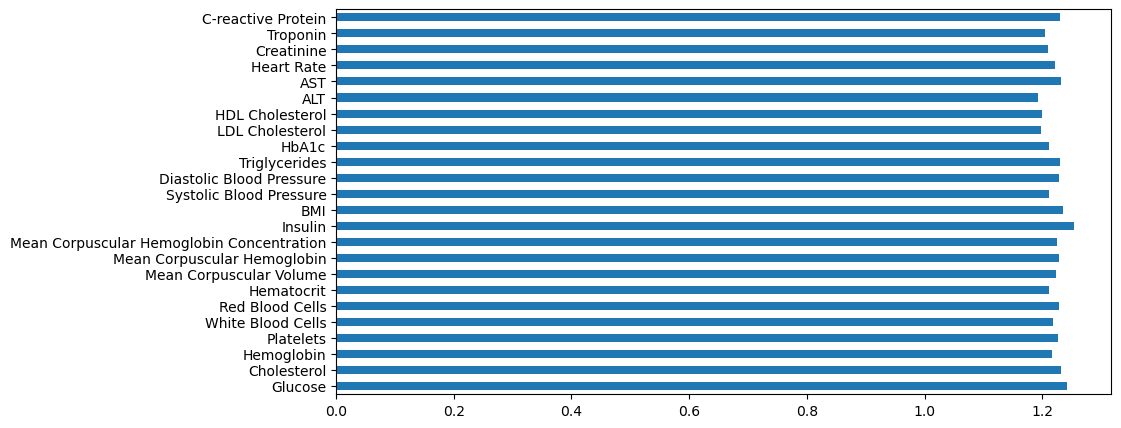

In [19]:
plt.figure(figsize=(10,5))
feat.plot(kind='barh')

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
ss=StandardScaler()

In [24]:
X_scaled_train=ss.fit_transform(X_train)

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [26]:
sv=SVC()

In [27]:
sv.fit(X_scaled_train,y_train)

SVC()

In [28]:
sv.score(X_scaled_train,y_train)

0.9810526315789474

In [29]:
param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')}

In [30]:
GS=GridSearchCV(estimator=sv,param_grid=param_grid,refit=True)

In [31]:
GS.fit(X_scaled_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [32]:
GS.score(X_scaled_train,y_train)

0.9810526315789474

In [33]:
GS.best_score_

0.9378947368421053

In [34]:
GS.get_params

<bound method BaseEstimator.get_params of GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})>

In [35]:
GS.best_params_

{'C': 1, 'kernel': 'rbf'}

In [36]:
X_scaled_test=ss.transform(X_test)

In [37]:
y_pred=sv.predict(X_scaled_test)

In [38]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

<AxesSubplot:>

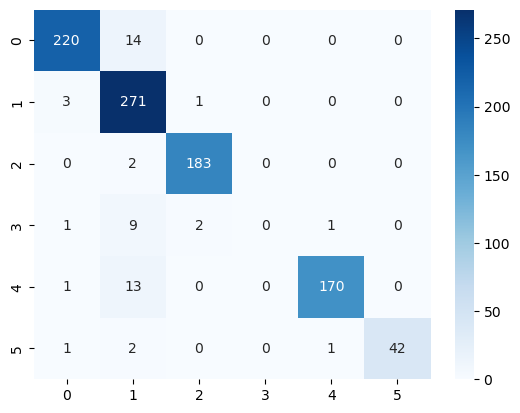

In [39]:
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='Blues',fmt='0.5g',annot=True)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       234
           1       0.87      0.99      0.92       275
           2       0.98      0.99      0.99       185
           3       0.00      0.00      0.00        13
           4       0.99      0.92      0.96       184
           5       1.00      0.91      0.95        46

    accuracy                           0.95       937
   macro avg       0.80      0.79      0.80       937
weighted avg       0.94      0.95      0.94       937



C:\Users\Samorjit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Samorjit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Samorjit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
sv.predict

<bound method BaseSVC.predict of SVC()>

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf=RandomForestClassifier(n_estimators=100,max_depth=4)

In [45]:
rf.fit(X_scaled_train,y_train)

RandomForestClassifier(max_depth=4)

In [46]:
rf.score(X_scaled_train,y_train)

0.8942105263157895

In [47]:
y_pred=rf.predict(X_scaled_test)

<AxesSubplot:>

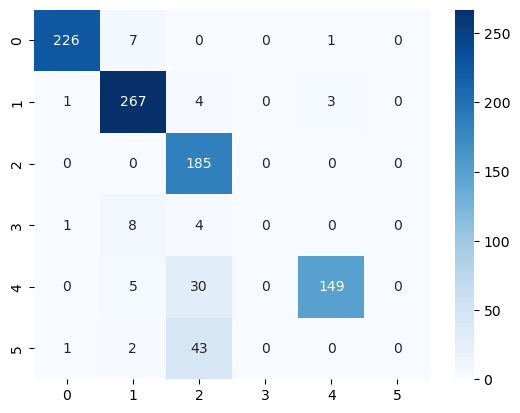

In [48]:
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='Blues',fmt='.5g',annot=True)

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       234
           1       0.92      0.97      0.95       275
           2       0.70      1.00      0.82       185
           3       0.00      0.00      0.00        13
           4       0.97      0.81      0.88       184
           5       0.00      0.00      0.00        46

    accuracy                           0.88       937
   macro avg       0.60      0.62      0.60       937
weighted avg       0.85      0.88      0.86       937



C:\Users\Samorjit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Samorjit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Samorjit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
